In [1]:
from matplotlib import pyplot as plt
from NewickParser import Tree,translate,limitslope
from math import pi

In [2]:
filename='myTree.nwk.txt'
language='en'

In [3]:
with open(filename,'r') as f:
      tree=Tree(f.read())
leafcount=len(list(tree.leaves))
root=Tree(x=1.05*tree.x,children=[tree])

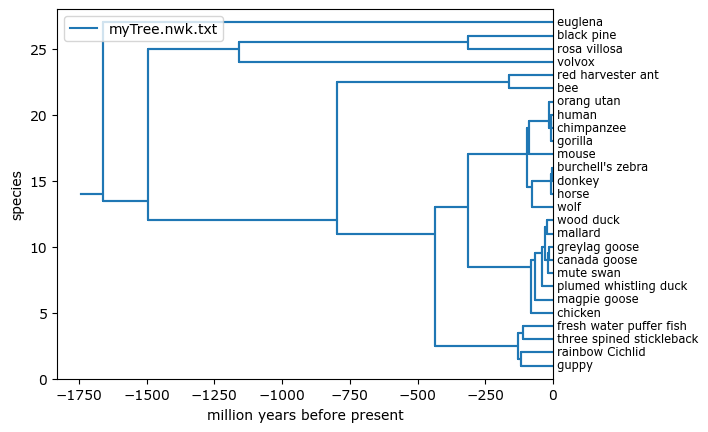

In [4]:
plt.rcdefaults()
plt.figure()
plt.plot([a[0] for a in root.lineplot()],[a[1] for a in root.lineplot()],marker=None,label=filename)
if leafcount<30:
    for node in tree.leaves:
        plt.text(node.x,node.y,' '+translate(namenode.name,language=language),va='center',ha='left',size='small')
plt.legend(loc='upper left')
plt.xlim(xmax=0)
plt.ylim(ymin=0,ymax=leafcount+1)
plt.xlabel('million years before present')
plt.ylabel('species')
plt.show()

In [5]:
language='de'

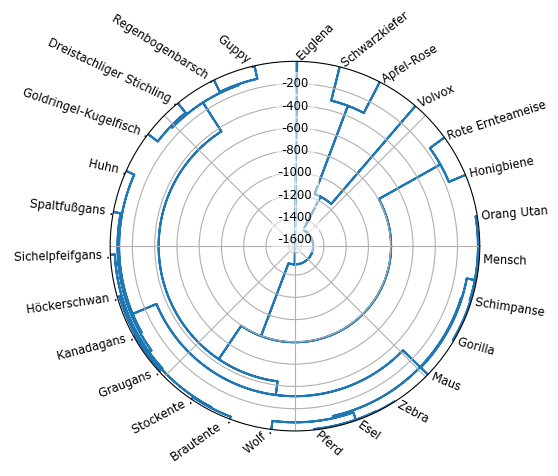

In [6]:
plt.rcdefaults()
plt.rc('ytick', labelsize='small')
fig=plt.figure()#figsize=(8,8.7))
dtheta=6.7*2*pi/leafcount
xy=[(a[0]+dtheta,(a[1]-tree.x)) for a in tree.lineplot_polar()]
plt.polar([a[0] for a in xy],[a[1] for a in xy],marker=None,label=filename,zorder=-1)
if leafcount<30*pi:
  for node in tree.leaves:
    theta=node.y/leafcount*pi*2+dtheta
    flip=1 if ((theta/(2*pi)+0.25)%1)>0.5 else 0
    plt.text(theta,-tree.x,' '+translate(node.name,language=language)+(' .' if flip else''),rotation=(limitslope(theta,45*pi/180)/pi+flip)*180,rotation_mode='anchor',va='center',ha=('left','right')[flip],fontsize='small') 
else:
  plt.legend(loc='upper left')
#  plt.xlim(xmax=0)
plt.ylim(ymin=0,ymax=-tree.x)
#  plt.ylabel('million years before present')
#  plt.xlabel('species')
timeticks=plt.yticks()[0]
#set_rlabel_position(85)
fig.axes[0].set_rlabel_position(90)
fig.axes[0].tick_params(labelleft=True, labelright=False,
             labeltop=False, labelbottom=False)
plt.yticks([-tree.x-t for t in timeticks[:-1]],[f'{-t:.0f}' for t in timeticks[:-1]],va='center',ha='center',bbox=dict(color='white',alpha=0.5))
plt.xticks(plt.xticks()[0],())
plt.show()